¡Hola! Soy un cuaderno de Jupyter. Jupyter permite tener celdas de texto combinadas con celdas de código de Python. En el menú de arriba tenemos un conjunto de herramientas. El principal es el botón que dice Run, este nos permite correr la celda. Da click en la siguiente celda, que tiene código de Python, y da click donde dice Run.

In [1]:
print("Hello World")

Hello World


Ahora da click en donde yo estoy, y luego da click en Insert > Insert Cell Below. Escribe algo de Python y córrelo

# Configuración

Si todo se configuró bien, la siguiente celda debería correr sin problemas. En esta importamos dos librerías.

[Pandas](https://pandas.pydata.org/): Estructuras de datos fáciles de usar para información más compleja. Aquí sólo vamos a utilizar [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), una estructura muy similar a una tabla.
[NumPy](http://www.numpy.org/): Esta librería la vamos a usar extensivamente a través del curso. NumPy tiene herramientas para computación científica muy potentes. Por ejemplo, utilizaremos numpy.array, los cuales son mucho más compactos. Esto es muy importante cuando empecemos a utilizar cientos de miles de ejemplos. [Una explicación un poco más detallada](https://stackoverflow.com/questions/993984/why-numpy-instead-of-python-lists).

Hola

In [1]:
import pandas as pd
import numpy as np

In [2]:
test = np.array([1, 2, 3])
test

array([1, 2, 3])

# Intro a Python
Empezaremos con una introducción de Python. Esta será breve porque Python es sencillo y hay muchos recursos donde aprenderlo en muy poco tiempo. Si te sientes cómodo con Python, salta a la sección del Perceptrón.

Esto es una variable. Como ven, no se debe asignar el tipo.

In [5]:
a = 10
a

10

In [6]:
a, b = 10, 5
print(a)
print(b)

10
5


In [7]:
# Esto es un comentario
if a > b:
    print("A es más grande")
else:
    print("B es más grande")

A es más grande


In [8]:
lst = [2, 4, 6, 8, 10, 12, 14]
print(lst)

[2, 4, 6, 8, 10, 12, 14]


In [9]:
# Aquí accedemos a los valores de la lista de diferentes maneras.
print(lst[0])
print(lst[-1])
print(lst[1:3])# Esto es un slice. Te permite acceder a varios elementos a la vez
print(lst[1:5])
print(lst[2:]) # ¿Podrías explicar qué está ocurriendo aquí?

2
14
[4, 6]
[4, 6, 8, 10]
[6, 8, 10, 12, 14]


In [10]:
for i in lst:
    print(i)

2
4
6
8
10
12
14


In [11]:
for i in range(5):
    print(i)

0
1
2
3
4


In [12]:
frutas = ["manzana", "peras", "platanos"]
for i, item in enumerate(frutas):
    print(i, item)

0 manzana
1 peras
2 platanos


In [13]:
def suma(nums):
    """
    Este es un comentario de muchas líneas. Es buena práctica utilizarlos para 
    describir funciones y al inicio de cada archivo.
    """
    total = 0
    for n in nums:
        total = total + n
    return total
suma(lst)

56

In [14]:
sum(lst)

56

Hay muchas cosas de Python que no hemos visitado. Si quieren aprender más, hay muchos recursos. Aquí hemos visitado los temas básicos (variables, condicionales, listas, iteraciones, funciones), pero hay muchos temas como clases, funciones lambda y mucho más.

# Explorando un Dataset

En 1912, el Titanic golpeó un iceberg y se hundió, resultando en la muerte de la mayoría de sus pasajeros. En esta sección vamos a explorar parte del dataset para determinar qué features predicen mejor si alguien sobrevivió o no sobrevivió. Este es un proyecto breve en el que tendrás que predecir ciertos comportamientos y contestar algunas preguntas. Recuerda ir ejecutando las celdas. 

En la siguiente celda se cargan las librerías y se carga el archivo csv (comma separated value) que tiene la información. 

In [17]:
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Arriba tenemos la tabla con los datos. Contesta las siguientes preguntas:

**Pregunta 1. ¿Cuáles son los features?**

**Pregunta 2. ¿Cuál es el output?**


Recuerda que puedes dar doble click y modificar esta celda.

Estos son los features que tenemos para cada pasajero:

* Survived: Si sobrevivió (0 = No; 1 = Yes)
* Pclass: Clase socioeconómica (1 = Upper class; 2 = Middle class; 3 = Lower class)
* Name: Nombre del pasajero
* Sex: Sexo del pasajero
* Age: Edad del pasajero (Algunas entradas tienen NaN)
* SibSp: Número de hermanos y esposo/as a bordo.
* Parch: Número de parientes e hijos a bordo.
* Ticket: El número del ticket del pasajero
* Fare: Cuánto se pagó por el ticket
* Cabin: Número de cabina (Algunas entradas tienen NaN)
* Embarked: Puerto de embarcación (C = Cherbourg; Q = Queenstown; S = Southampton)

Como nos interesa saber el outcome, o lo que ocurrió con el pasajero (si sobrevivió), podemos separar la info en X y Y.

In [18]:
# Guardamos la columna 'Survived' y la quitamos del dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Mustra el nuevo dataset con la columna 'Survived' fuera
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nota que ahora data y outcomes están en pareja. Esto quiere decir que el elemento número 20 de data (info del pasajero 20) corresponde al elemento 20 de outcomes. 

Lo primero que nos interesa es crear una medida para saber qué tan precisas son nuestras predicciones. Corre la siguiente celda para crear una función que hace esto.

In [20]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Asegura que el número de predicciones es igual al número de verdad.
    if len(truth) == len(pred): 
        
        # Calcula y devuelve la exactitud como porcentaje
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


Si nos piden que hagamos una predicción de cualquier pasajero del Titanic sin saber nada, lo mejor que podemos decir es que nadie sobrevivió (asumimos que la mayoría falleció). La siguiente función propone un modelo en el que nadie sobrevivió.

In [23]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

**Pregunta 3. Usando la información del Titanic, ¿qué tan exacto es una predicción en el que nadie sobrevivió?** 

Usa la siguiente celda:

In [25]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


Para revisar si el feature Sex tiene alguna indicación de si un pasajero sobrevivió o no, vamos a utilizar la función survival_stats. Esta ya está implementada en el archivo visuals.py. Los primeros dos parámetros son la información del Titanic y los resultados de supervivencia, respectivamente. El último parámetro indica cuál es el feature que se utiliza para la gráfica. 

Corre la celda para crear la gráfica.

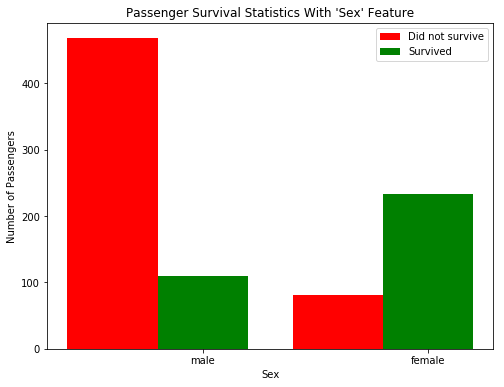

In [27]:
import visuals as vs
vs.survival_stats(data, outcomes, 'Sex')

Examninando la gráfica anterior, la mayoría de los hombres no sobrevivieron. Mientras tanto, la mayoría de las mujeres sobrevivieron. Ejecuta la siguiente celda para crear un modelo que predice que cuando es un hombre, no sobrevivió y que cuando es una mujer, sobrevivió.

In [36]:
def predictions_1(data):
    """ Model with one feature: 
        - Predict a passenger survived if they are female. 
    """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        sex = passenger['Sex']
        if(sex == "male"):
            predictions.append(0)
        else:
            predictions.append(1)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

**Pregunta 4. ¿Qué tan exacto es este modelo? Crea una celda abajo y utiliza la función accuracy_score para ver qué tan exacto es este modelo. ¿Es lo que esperabas?**

Nos dimos cuenta que hay una relación entre el Sex feature y utilizamos esto para aumentar la exactitud de nuestro modelo. Vamos a considerar cómo puede afectar la edad (Age) para predecir si sobrevivió un pasajero.

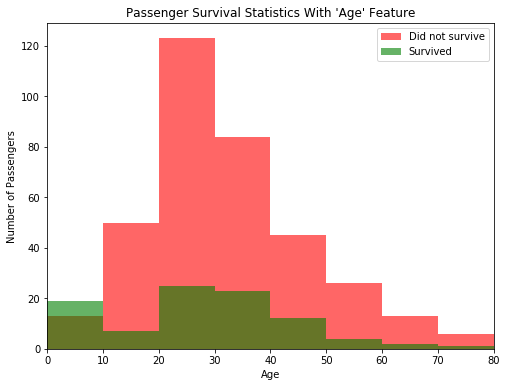

In [32]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

**Pregunta 5. ¿En qué grupo de edad sobrevivieron más de los que no sobrevivieron**

Agregar el Age feature como una condición con el Sex feature puede mejorar ligeramente el modelo. Implementa la función, basándote en predictions_0, para agregar el componente de edad entre los hombres. Intenta por tu cuenta, pero, si no puedes, las respuestas están hasta abajo. Tu modelo debería tener más de 79% de precisión.

**Pregunta 6. Implementa las condiciones en la siguiente función. ¿Qué tan preciso es este modelo?**

In [34]:
def predictions_1(data):
    """ Model with two features: 
        - Predict a passenger survived if they are female.
        - Predict a passenger survived if they are male and younger than 10. 
    """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        sex = passenger['Sex']
        
        if(sex == "male"):
            predictions.append(0)
        else:
            predictions.append(1)
    After several iterations of exploring and conditioning on the data, you have built a useful algorithm for predicting the survival of each passenger aboard the RMS Titanic. The technique applied in this project is a manual implementation of a simple machine learning model, the decision tree. A decision tree splits a set of data into smaller and smaller groups (called nodes), by one feature at a time. Each time a subset of the data is split, our predictions become more accurate if each of the resulting subgroups are more homogeneous (contain similar labels) than before. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. This link provides another introduction into machine learning using a decision tree.

A decision tree is just one of many models that come from supervised learning. In supervised learning, we attempt to use features of the data to predict or model things with objective outcome labels. That is to say, each of our data points has a known outcome value, such as a categorical, discrete label like 'Survived', or a numerical, continuous value like predicting the price of a house.


    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


# Conclusiones

Después de iterar la exploración y condicionamiento de nuestra información, hemos construido un algoritmo relativamente útil para predecir si un pasajero a bordo del Titanic Sobrevivió. Puedes probar agregando nuevos features. Utiliza survival_data con otros features como su clase socioeconómica para ver cómo impactan.

Esta técnica es una implementación manual de un modelo sencillo llamado Decision Tree o árbol de decisiones. Los árboles de decisiones separar un conjunto de data en grupos cada vez más pequeños (llamados nodes) utilizando un feature a la vez. Cada vez que se divide un conjunto de la data, las predicciones se hacen más exactas. 

La ventaja de que esto lo haga una computadora es que pueden hacer un trabajo más exhaustivo y preciso que nuestra exploración manual. Un árbol de decisiones es uno de diferentes modelos de aprendizaje supervisado. 

Para cerrar la semana (ya casi!), haz las siguientes cosas:
1. Leer rápidamente la siguiente visualización de ML y árboles de decisiones: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ (~5 minutos)
2. Anda a la sección de repasar temas. Es importante que para la próxima sesión contestes las preguntas del cuestionario. (~15 minutos). 
3. Si quieres una manera más rigurosa matemática de regresión lineal, revisa el libro el capítulo 3 - su introducción y la sección 3.1 (~20 minutos).


# Soluciones

In [ ]:
def predictions_1(data):
    """ Model with one feature: 
        - Predict a passenger survived if they are female. 
    """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        sex = passenger['Sex']
        age = passenger['Age']
        
        if(sex == "male"):
            if(age < 10):
                predictions.append(1)
            else:
                predictions.append(0)
        else:
            predictions.append(1)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)
print(accuracy_score(outcomes, predictions))